# Methodology 🧪 👩‍🔬

In [28]:
import numpy as np
import os
from PIL import Image

grayscaled_pictures_folder = "./data/selected_pictures/grayscaled"

## Convert Grayscale Images into Vectors 📷 ➡️ 📈

In [29]:
# load images into numpy arrays of the same size
images = []
images_names = []
for image_path in os.listdir(grayscaled_pictures_folder):
    image = Image.open(os.path.join(grayscaled_pictures_folder, image_path))
    # convert image array into vector
    images_names.append(image_path)
    images.append(np.array(image).reshape(-1))

images_names = np.array(images_names) 

In [30]:
#print(grayscaled_images.shape)
images_array = np.array(images)
print(images_array.ndim)
print(images_array)
print(images_names)

2
[[180 179 179 ... 128 128 128]
 [190 190 190 ...   6  12  23]
 [177 177 177 ... 128 128 129]
 ...
 [255 255 255 ... 135 135 135]
 [193 194 194 ...  20  19  18]
 [185 186 186 ...  59  64  69]]
['20a.jpg' '82b.jpg' '20b.jpg' '82a.jpg' '66a.jpg' '50b.jpg' '66b.jpg'
 '50a.jpg' '10a.jpg' '26b.jpg' '10b.jpg' '26a.jpg' '72a.jpg' '25a.jpg'
 '29b.jpg' '87b.jpg' '72b.jpg' '25b.jpg' '29a.jpg' '87a.jpg' '32b.jpg'
 '1000a.jpg' '32a.jpg' '1000b.jpg' '58b.jpg' '58a.jpg' '63a.jpg' '96b.jpg'
 '43b.jpg' '63b.jpg' '96a.jpg' '43a.jpg']


In [31]:
print(images_array.shape)

(32, 93600)


## Calculate the `average image vector` 📈 ➡️ 📈

In [32]:
# calculate average vector of images_array
average_vector = np.mean(images_array, axis=0)
print(average_vector.shape)

(93600,)


## Subtract the `average image vector` from every vector of the Grayscale Image matrix to obtain the `zero mean vector`. 📈 ➖ 📈 ➡️ 📈

In [33]:
# subtract average vector from each image vector
zero_mean_images_array = images_array - average_vector
print(zero_mean_images_array.shape)
print(np.mean(zero_mean_images_array, axis=0))

(32, 93600)
[0. 0. 0. ... 0. 0. 0.]


## Apply PCA in `zero mean vector` to extract the `principal components matrix`. 📈 PCA ➡️ 📈

In [34]:
# apply pca to zero_mean_images_array
from sklearn.decomposition import PCA
n_features =2 

pca = PCA(n_components=n_features)
pca.fit(zero_mean_images_array)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.components_.shape)
print(pca.components_)
print(pca.components_.T.shape)
print(pca.components_.T)

print(pca)


[0.30134359 0.19354081]
[39674.91075498 31795.90980368]
(2, 93600)
[[-5.18823259e-04 -8.23631861e-04 -8.15220916e-04 ...  6.38724113e-03
   6.39348690e-03  6.36881054e-03]
 [-6.65158805e-05  6.36178252e-04  7.16232773e-04 ...  8.76943418e-04
   9.08824607e-04  9.60836960e-04]]
(93600, 2)
[[-5.18823259e-04 -6.65158805e-05]
 [-8.23631861e-04  6.36178252e-04]
 [-8.15220916e-04  7.16232773e-04]
 ...
 [ 6.38724113e-03  8.76943418e-04]
 [ 6.39348690e-03  9.08824607e-04]
 [ 6.36881054e-03  9.60836960e-04]]
PCA(n_components=2)


## Multiply the `principal components matrix` with the `zero mean vector` to obtain the `reduced vector`. 📈 ✖️ 📈 ➡️ 📈

In [35]:
# multiply zero_mean_images_array by pca.components_.T
pca_images_array = np.dot(zero_mean_images_array, pca.components_.T)
print(pca_images_array.shape)

(32, 2)


## Compare Images in the PCA plane 🧐 🔬

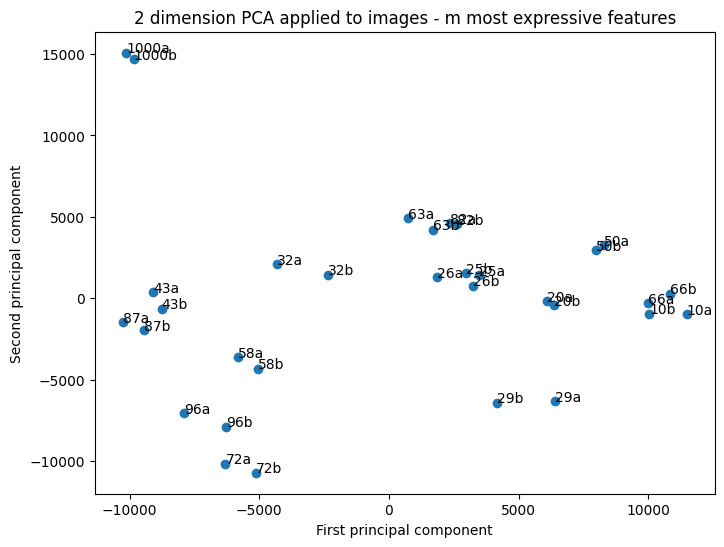

In [36]:
# plot pca_images_array with images_names
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(pca_images_array[:, 0], pca_images_array[:, 1])
for i, image_name in enumerate(images_names):
    plt.annotate(image_name.split(".")[0], (pca_images_array[i, 0], pca_images_array[i, 1]))

plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("2 dimension PCA applied to images - m most expressive features") 
plt.show()


## Apply `MLDA` to the `reduced vector` to obtain the `discriminant vector`. 📈 MLDA ➡️ 📈

In [37]:
# apply linear discriminant analysis to pca_images_array
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# apply LinearDiscriminantAnalysis to pca_images_array
lda = LinearDiscriminantAnalysis(n_components=1, solver="eigen")
# get only the sufix of the image name
#images_names_sufix = np.array([image_name.split(".")[0][-1] for image_name in images_names])
# get only the numeric part of the image name
images_names_prefix = np.array([int(image_name.split(".")[0][:-1]) for image_name in images_names])
print(images_names_prefix)
lda.fit(pca_images_array, images_names_prefix)
#lda_images_array = lda.transform(pca_images_array)
eigenvalues = lda.scalings_
# sort eigenvalues descending
eigenvalues = eigenvalues[np.argsort(eigenvalues)[::-1]][0][0]
np.array(eigenvalues)
print(eigenvalues.shape)

[  20   82   20   82   66   50   66   50   10   26   10   26   72   25
   29   87   72   25   29   87   32 1000   32 1000   58   58   63   96
   43   63   96   43]
(2,)


## Multiply the `matrix of m most expressive features of each one of the N vectors` against `m x 1 vector` to obtain the `most discriminant feature vector` 📈 ✖️ 📈 ➡️ 📈

In [38]:
# multiply pca_images_array by eigenvalues
pca_lda_images_array = np.dot(pca_images_array, eigenvalues)
print(pca_lda_images_array.shape)

(32,)


## Compare Images in the PCA + MLDA plane 🧐 🔬

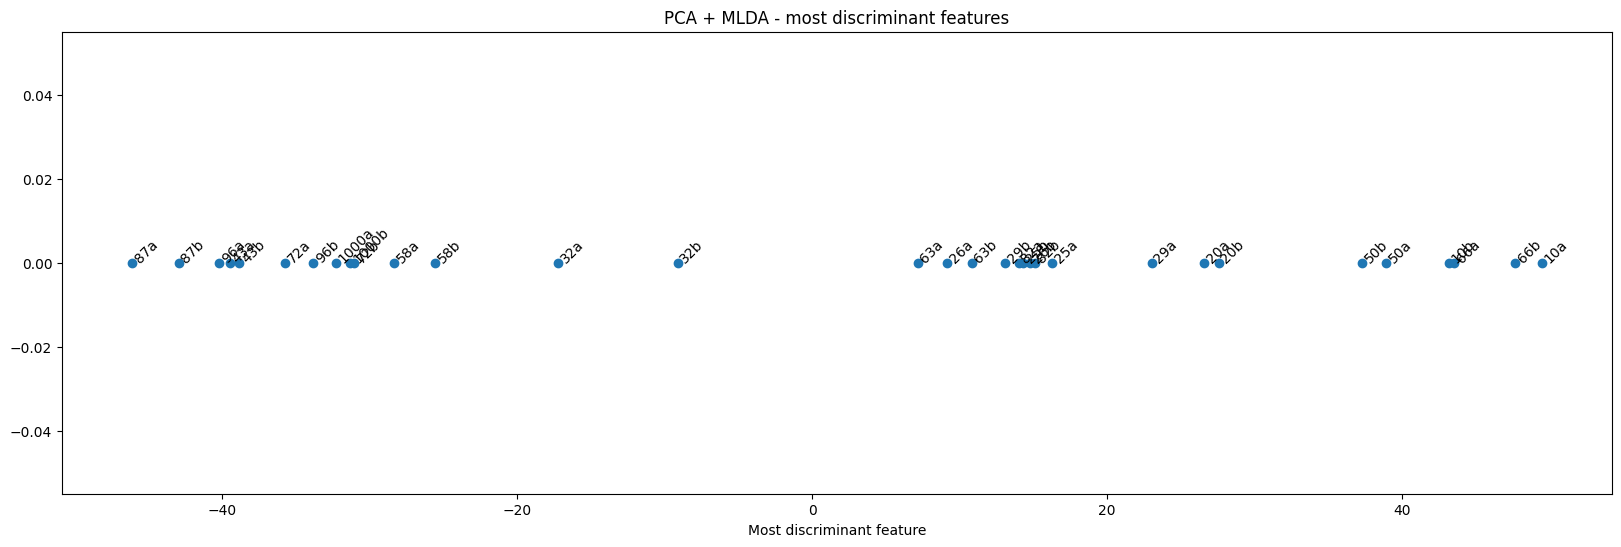

In [39]:
# plot pca_lda_images_array with images_names
plt.figure(figsize=(20, 6))
plt.scatter(pca_lda_images_array, np.zeros(pca_lda_images_array.shape))
for i, image_name in enumerate(images_names):
    plt.annotate(image_name.split(".")[0], (pca_lda_images_array[i], 0), rotation=45)
plt.xlabel("Most discriminant feature")
plt.title("PCA + MLDA - most discriminant features") 
plt.show()
